

# CREDIT CARD APPROVAL PREDICTION

credit-card-mockup_28616-608.avif

A bank's credit card department is one of the top adopters of data science. A top focus for the bank has always been acquiring new credit card customers. Giving out credit cards without doing proper research or evaluating applicants' creditworthiness is quite risky. The credit card department has been using a data-driven system for credit assessment called Credit Scoring for many years, and the model is known as an application scorecard. A credit card application's cutoff value is determined using the application scorecard, which also aids in estimating the applicant's level of risk. This decision is made based on strategic priority at a given time.

Customers must fill out a form, either physically or online, to apply for a credit card. The application data is used to evaluate the applicant's creditworthiness. The decision is made using the application data in addition to the Credit Bureau Score, such as the FICO Score in the US or the CIBIL Score in India, and other internal information on the applicants. Additionally, the banks are rapidly taking a lot of outside data into account to enhance the caliber of credit judgements.

**Build a Machine Learning Model to predict the Credit Card Approval**

**IMPORTING THE LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import joblib

**LOADING AND UNDERSTANDING THE DATA**

In [ ]:
Client_info = pd.read_csv("Credit_card.csv")
Client_info

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2


In [ ]:
Client_info.shape

(1548, 18)

In [ ]:
Client_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [ ]:
Client_info.describe(include = "all")

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
count,1.548000e+03,1541,1548,1548,1548.000000,1.525000e+03,1548,1548,1548,1548,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1060,1548.000000
unique,NaN,2,2,2,NaN,NaN,4,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN
freq,NaN,973,924,1010,NaN,NaN,798,1031,1049,1380,NaN,NaN,NaN,NaN,NaN,NaN,268,NaN
mean,5.078920e+06,NaN,NaN,NaN,0.412791,1.913993e+05,NaN,NaN,NaN,NaN,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,NaN,2.161499
std,4.171759e+04,NaN,NaN,NaN,0.776691,1.132530e+05,NaN,NaN,NaN,NaN,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,NaN,0.947772
min,5.008827e+06,NaN,NaN,NaN,0.000000,3.375000e+04,NaN,NaN,NaN,NaN,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,NaN,1.000000
25%,5.045070e+06,NaN,NaN,NaN,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,NaN,2.000000
50%,5.078842e+06,NaN,NaN,NaN,0.000000,1.665000e+05,NaN,NaN,NaN,NaN,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000
75%,5.115673e+06,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,NaN,3.000000


In [ ]:
Approval_status = pd.read_csv("Credit_card_label.csv")
Approval_status

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1
...,...,...
1543,5028645,0
1544,5023655,0
1545,5115992,0
1546,5118219,0


In [ ]:
Approval_status.shape

(1548, 2)

In [ ]:
Approval_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ind_ID  1548 non-null   int64
 1   label   1548 non-null   int64
dtypes: int64(2)
memory usage: 24.3 KB


In [ ]:
Client_Data = Client_info.merge(Approval_status,how = "inner", on = ["Ind_ID"])

In [ ]:
Client_Data.shape

(1548, 19)

In [ ]:
Client_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [ ]:
Client_Data.dtypes

Ind_ID               int64
GENDER              object
Car_Owner           object
Propert_Owner       object
CHILDREN             int64
Annual_income      float64
Type_Income         object
EDUCATION           object
Marital_status      object
Housing_type        object
Birthday_count     float64
Employed_days        int64
Mobile_phone         int64
Work_Phone           int64
Phone                int64
EMAIL_ID             int64
Type_Occupation     object
Family_Members       int64
label                int64
dtype: object

In [ ]:
Client_Data.nunique()

Ind_ID             1548
GENDER                2
Car_Owner             2
Propert_Owner         2
CHILDREN              6
Annual_income       115
Type_Income           4
EDUCATION             5
Marital_status        5
Housing_type          6
Birthday_count     1270
Employed_days       956
Mobile_phone          1
Work_Phone            2
Phone                 2
EMAIL_ID              2
Type_Occupation      18
Family_Members        7
label                 2
dtype: int64

In [ ]:
Client_Data.isna().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [ ]:
Client_Data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [ ]:
correlation = Client_Data.corr()
correlation

<ipython-input-89-334b6f082194>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = Client_Data.corr()


,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
Ind_ID,1.000000,0.032535,0.030147,0.022909,-0.055396,NaN,0.085794,0.008403,-0.037923,0.016950,0.016796
CHILDREN,0.032535,1.000000,0.078497,0.279716,-0.219095,NaN,0.035014,-0.004908,0.025776,0.890248,-0.021646
Annual_income,0.030147,0.078497,1.000000,0.111638,-0.160175,NaN,-0.071171,-0.006439,0.122320,0.050957,0.027456
Birthday_count,0.022909,0.279716,0.111638,1.000000,-0.619039,NaN,0.174687,-0.029215,0.166749,0.266527,-0.045097
Employed_days,-0.055396,-0.219095,-0.160175,-0.619039,1.000000,NaN,-0.231184,-0.003403,-0.118268,-0.238705,0.031408
Mobile_phone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Work_Phone,0.085794,0.035014,-0.071171,0.174687,-0.231184,NaN,1.000000,0.352439,-0.009594,0.072228,-0.007046
Phone,0.008403,-0.004908,-0.006439,-0.029215,-0.003403,NaN,0.352439,1.000000,0.018105,0.005372,-0.000664
EMAIL_ID,-0.037923,0.025776,0.122320,0.166749,-0.118268,NaN,-0.009594,0.018105,1.000000,0.035098,0.012921
Family_Members,0.016950,0.890248,0.050957,0.266527,-0.238705,NaN,0.072228,0.005372,0.035098,1.000000,-0.030709


**DATA PREPARATION**

In [ ]:
Client_Data.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

In [ ]:
new_cols_name = ["ID","GENDER","CAR_OWNER","PROPERTY_OWNER","NO_OF_CHILD","ANNUAL_INCOME","INCOME_SOURCE","EDUCATION_LEVEL",
     "MARTIAL_STATUS","HOUSE_TYPE","AGE","WORK_EXP","MOBILE_PHONE","WORK_PHONE","PHONE","EMAIL","OCCUPATION","FAMILY_MEMBERS",
     "APPLICATION"]

Client_Data.columns = new_cols_name

In [ ]:
Client_Data.head(2)

,ID,GENDER,CAR_OWNER,PROPERTY_OWNER,NO_OF_CHILD,ANNUAL_INCOME,INCOME_SOURCE,EDUCATION_LEVEL,MARTIAL_STATUS,HOUSE_TYPE,AGE,WORK_EXP,MOBILE_PHONE,WORK_PHONE,PHONE,EMAIL,OCCUPATION,FAMILY_MEMBERS,APPLICATION
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [ ]:
Client_Data.drop("MOBILE_PHONE",axis = 1,inplace = True)

In [ ]:
correlation = Client_Data.corr()
correlation

<ipython-input-94-334b6f082194>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = Client_Data.corr()


,ID,NO_OF_CHILD,ANNUAL_INCOME,AGE,WORK_EXP,WORK_PHONE,PHONE,EMAIL,FAMILY_MEMBERS,APPLICATION
ID,1.000000,0.032535,0.030147,0.022909,-0.055396,0.085794,0.008403,-0.037923,0.016950,0.016796
NO_OF_CHILD,0.032535,1.000000,0.078497,0.279716,-0.219095,0.035014,-0.004908,0.025776,0.890248,-0.021646
ANNUAL_INCOME,0.030147,0.078497,1.000000,0.111638,-0.160175,-0.071171,-0.006439,0.122320,0.050957,0.027456
AGE,0.022909,0.279716,0.111638,1.000000,-0.619039,0.174687,-0.029215,0.166749,0.266527,-0.045097
WORK_EXP,-0.055396,-0.219095,-0.160175,-0.619039,1.000000,-0.231184,-0.003403,-0.118268,-0.238705,0.031408
WORK_PHONE,0.085794,0.035014,-0.071171,0.174687,-0.231184,1.000000,0.352439,-0.009594,0.072228,-0.007046
PHONE,0.008403,-0.004908,-0.006439,-0.029215,-0.003403,0.352439,1.000000,0.018105,0.005372,-0.000664
EMAIL,-0.037923,0.025776,0.122320,0.166749,-0.118268,-0.009594,0.018105,1.000000,0.035098,0.012921
FAMILY_MEMBERS,0.016950,0.890248,0.050957,0.266527,-0.238705,0.072228,0.005372,0.035098,1.000000,-0.030709
APPLICATION,0.016796,-0.021646,0.027456,-0.045097,0.031408,-0.007046,-0.000664,0.012921,-0.030709,1.000000


In [ ]:
Client_Data.duplicated().sum()

0

In [ ]:
Client_Data.isna().sum().sort_values(ascending = False)

OCCUPATION         488
ANNUAL_INCOME       23
AGE                 22
GENDER               7
ID                   0
FAMILY_MEMBERS       0
EMAIL                0
PHONE                0
WORK_PHONE           0
WORK_EXP             0
HOUSE_TYPE           0
MARTIAL_STATUS       0
EDUCATION_LEVEL      0
INCOME_SOURCE        0
NO_OF_CHILD          0
PROPERTY_OWNER       0
CAR_OWNER            0
APPLICATION          0
dtype: int64

In [ ]:
Client_Data.isna().mean()*100

ID                  0.000000
GENDER              0.452196
CAR_OWNER           0.000000
PROPERTY_OWNER      0.000000
NO_OF_CHILD         0.000000
ANNUAL_INCOME       1.485788
INCOME_SOURCE       0.000000
EDUCATION_LEVEL     0.000000
MARTIAL_STATUS      0.000000
HOUSE_TYPE          0.000000
AGE                 1.421189
WORK_EXP            0.000000
WORK_PHONE          0.000000
PHONE               0.000000
EMAIL               0.000000
OCCUPATION         31.524548
FAMILY_MEMBERS      0.000000
APPLICATION         0.000000
dtype: float64

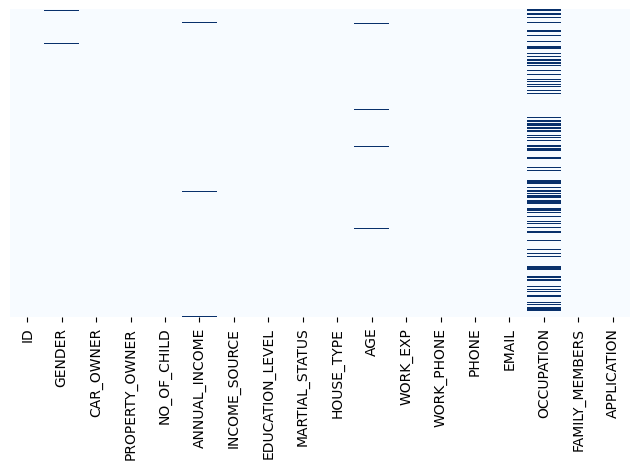

In [ ]:
plt.figure(figsize=(8,4))
cols = Client_Data.columns
sns.heatmap(Client_Data[cols].isna(),cmap = "Blues",yticklabels = False,cbar = False)
plt.show()

In [ ]:
Client_Data = Client_Data.dropna(subset = ["GENDER","ANNUAL_INCOME","AGE"] )

In [ ]:
Client_Data["OCCUPATION"].value_counts()

Laborers                 259
Core staff               171
Managers                 130
Sales staff              118
Drivers                   85
High skill tech staff     62
Medicine staff            49
Accountants               42
Security staff            24
Cleaning staff            20
Cooking staff             19
Private service staff     16
Low-skill Laborers         9
Secretaries                9
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: OCCUPATION, dtype: int64

In [ ]:
Client_Data["OCCUPATION"].fillna("Other",inplace = True)

In [ ]:
Client_Data.isna().sum()

ID                 0
GENDER             0
CAR_OWNER          0
PROPERTY_OWNER     0
NO_OF_CHILD        0
ANNUAL_INCOME      0
INCOME_SOURCE      0
EDUCATION_LEVEL    0
MARTIAL_STATUS     0
HOUSE_TYPE         0
AGE                0
WORK_EXP           0
WORK_PHONE         0
PHONE              0
EMAIL              0
OCCUPATION         0
FAMILY_MEMBERS     0
APPLICATION        0
dtype: int64

In [ ]:
Client_Data.head(2)

,ID,GENDER,CAR_OWNER,PROPERTY_OWNER,NO_OF_CHILD,ANNUAL_INCOME,INCOME_SOURCE,EDUCATION_LEVEL,MARTIAL_STATUS,HOUSE_TYPE,AGE,WORK_EXP,WORK_PHONE,PHONE,EMAIL,OCCUPATION,FAMILY_MEMBERS,APPLICATION
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,0,0,0,Other,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,Other,2,1


In [ ]:
Client_Data['AGE']=-(Client_Data['AGE'])//365

In [ ]:
x = Client_Data["WORK_EXP"] > 0
y = 0

Client_Data.loc[x,"WORK_EXP"] = y

In [ ]:
Client_Data['WORK_EXP']=-(Client_Data['WORK_EXP'])//365

In [ ]:
Client_Data.head(2)

,ID,GENDER,CAR_OWNER,PROPERTY_OWNER,NO_OF_CHILD,ANNUAL_INCOME,INCOME_SOURCE,EDUCATION_LEVEL,MARTIAL_STATUS,HOUSE_TYPE,AGE,WORK_EXP,WORK_PHONE,PHONE,EMAIL,OCCUPATION,FAMILY_MEMBERS,APPLICATION
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,0,0,0,0,Other,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,1,1,1,0,Other,2,1


In [ ]:
Client_Data["AGE"].value_counts()

27.0    56
37.0    55
32.0    51
41.0    50
43.0    48
39.0    48
47.0    45
33.0    45
29.0    43
57.0    42
38.0    41
31.0    40
51.0    39
34.0    39
35.0    38
42.0    38
28.0    38
40.0    37
48.0    36
46.0    36
49.0    36
55.0    35
58.0    34
54.0    34
44.0    33
52.0    33
60.0    33
30.0    31
56.0    30
36.0    29
50.0    27
45.0    27
62.0    27
53.0    27
59.0    26
64.0    25
63.0    24
26.0    20
25.0    19
24.0    19
61.0    16
66.0    15
65.0    11
67.0     8
23.0     5
22.0     5
68.0     1
21.0     1
Name: AGE, dtype: int64

In [ ]:
Client_Data["WORK_EXP"].value_counts()

0     355
1     140
4     127
2     109
6     106
3     104
5      77
9      65
8      61
7      55
10     49
14     27
12     26
11     24
15     20
13     20
22     16
20     16
18     16
19     14
17     12
16     11
23      6
25      6
31      5
29      5
21      5
32      3
27      3
24      2
35      2
26      2
33      2
34      1
40      1
37      1
28      1
36      1
Name: WORK_EXP, dtype: int64

In [ ]:
Client_Data.dtypes

ID                   int64
GENDER              object
CAR_OWNER           object
PROPERTY_OWNER      object
NO_OF_CHILD          int64
ANNUAL_INCOME      float64
INCOME_SOURCE       object
EDUCATION_LEVEL     object
MARTIAL_STATUS      object
HOUSE_TYPE          object
AGE                float64
WORK_EXP             int64
WORK_PHONE           int64
PHONE                int64
EMAIL                int64
OCCUPATION          object
FAMILY_MEMBERS       int64
APPLICATION          int64
dtype: object

In [ ]:
Client_Data["AGE"] = Client_Data["AGE"].astype(int)

In [ ]:
Client_Data["ANNUAL_INCOME"] = Client_Data["ANNUAL_INCOME"].astype(int)

In [ ]:
Client_Data.head(2)

,ID,GENDER,CAR_OWNER,PROPERTY_OWNER,NO_OF_CHILD,ANNUAL_INCOME,INCOME_SOURCE,EDUCATION_LEVEL,MARTIAL_STATUS,HOUSE_TYPE,AGE,WORK_EXP,WORK_PHONE,PHONE,EMAIL,OCCUPATION,FAMILY_MEMBERS,APPLICATION
0,5008827,M,Y,Y,0,180000,Pensioner,Higher education,Married,House / apartment,51,0,0,0,0,Other,2,1
1,5009744,F,Y,N,0,315000,Commercial associate,Higher education,Married,House / apartment,37,1,1,1,0,Other,2,1


In [ ]:
Client_Data.to_csv("Client_Data.csv",index = False)

**DATA VISUALIZATION**

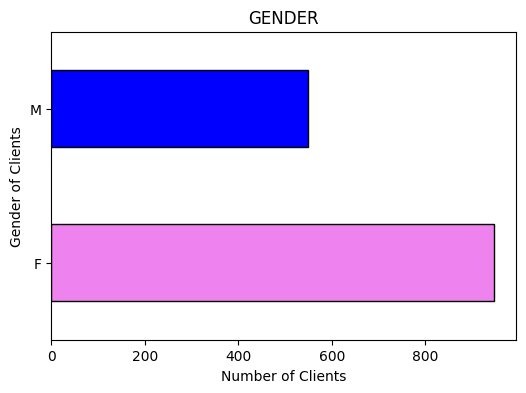

In [ ]:
plt.figure(figsize =(6,4))
gender = Client_Data["GENDER"].value_counts().plot(kind = "barh",color = ["violet","blue"], title = "GENDER",edgecolor = "black")

gender.set_xlabel("Number of Clients")
gender.set_ylabel("Gender of Clients")
plt.show()

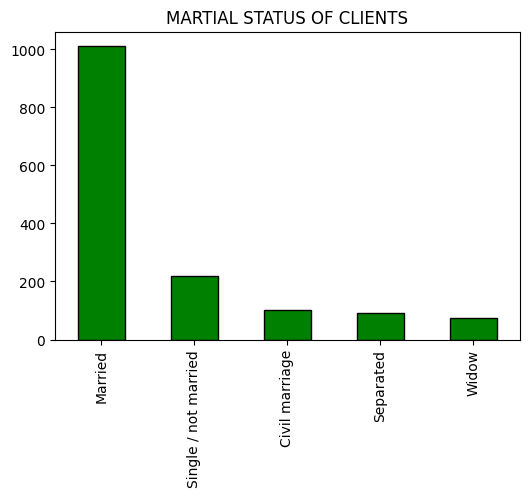

In [ ]:
plt.figure(figsize = (6,4))
Client_Data["MARTIAL_STATUS"].value_counts().plot(kind = "bar", title = "MARTIAL STATUS OF CLIENTS",color = "green",edgecolor = "black")
plt.show()

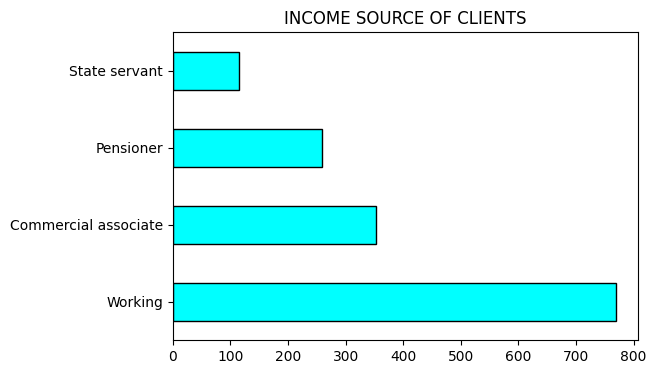

In [ ]:
plt.figure(figsize = (6,4))
Client_Data["INCOME_SOURCE"].value_counts().plot(kind = "barh",title = "INCOME SOURCE OF CLIENTS",color = "cyan",edgecolor = "black")
plt.show()

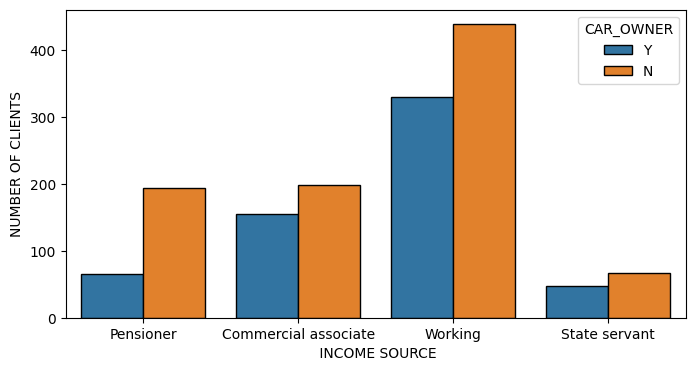

In [ ]:
plt.figure(figsize = (8,4))
sns.countplot(x = "INCOME_SOURCE",hue = "CAR_OWNER",data = Client_Data,edgecolor = "black")
plt.xlabel(" INCOME SOURCE")
plt.ylabel("NUMBER OF CLIENTS")
plt.show()

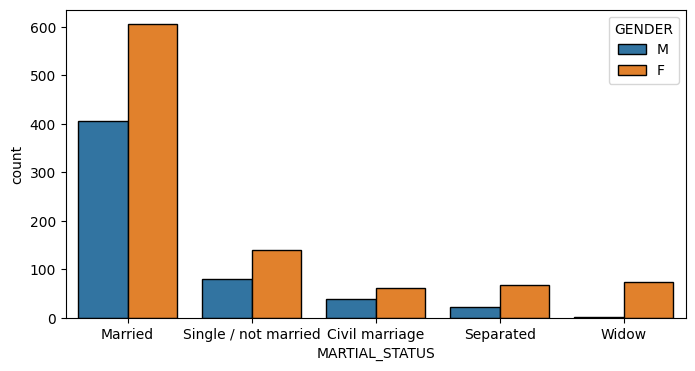

In [ ]:
plt.figure(figsize = (8,4))
sns.countplot(x = "MARTIAL_STATUS",hue = "GENDER",data = Client_Data,edgecolor = "black" )
plt.show()

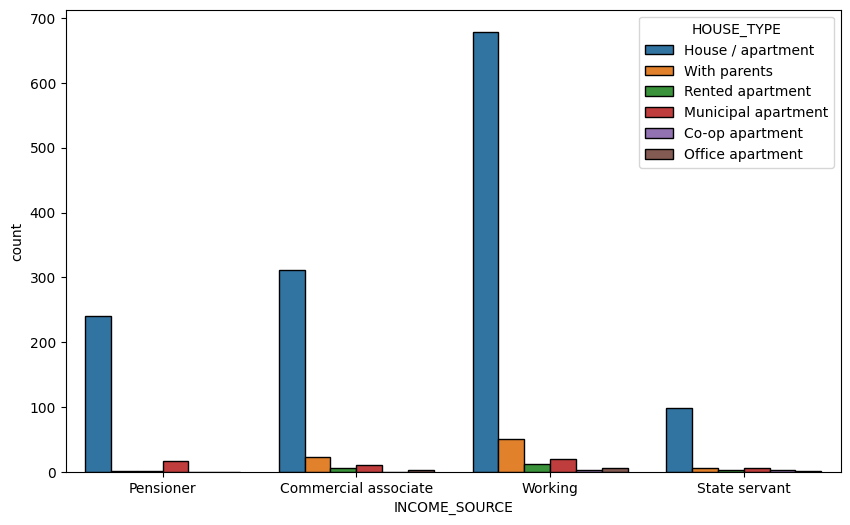

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(x = "INCOME_SOURCE",hue = "HOUSE_TYPE",data = Client_Data,edgecolor = "black")
plt.show()

<ipython-input-121-12b6a1baf438>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Client_Data.corr(),annot = True,cmap = "RdYlGn")


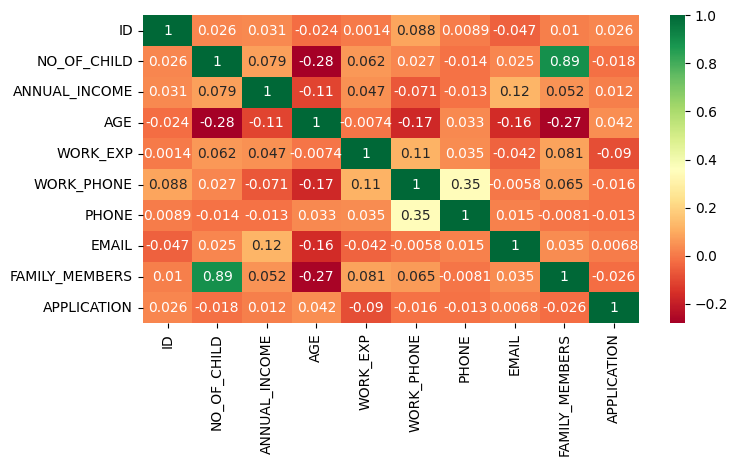

In [ ]:
plt.figure(figsize = (8,4))

sns.heatmap(Client_Data.corr(),annot = True,cmap = "RdYlGn")
plt.show()

**FREQUENCY ENCODING**

In [ ]:
col_encode = ["GENDER","CAR_OWNER","PROPERTY_OWNER","INCOME_SOURCE","EDUCATION_LEVEL","MARTIAL_STATUS","HOUSE_TYPE","OCCUPATION"]

In [ ]:
freq_dict = {}

In [ ]:
for col in col_encode:
  freq_dict[col] = Client_Data[col].value_counts(normalize = True)

In [ ]:
for col in col_encode:
  Client_Data[col] = Client_Data[col].map(freq_dict[col])

In [ ]:
Client_Data.head(2)

,ID,GENDER,CAR_OWNER,PROPERTY_OWNER,NO_OF_CHILD,ANNUAL_INCOME,INCOME_SOURCE,EDUCATION_LEVEL,MARTIAL_STATUS,HOUSE_TYPE,AGE,WORK_EXP,WORK_PHONE,PHONE,EMAIL,OCCUPATION,FAMILY_MEMBERS,APPLICATION
0,5008827,0.366979,0.399733,0.653075,0,180000,0.173128,0.273396,0.675802,0.889706,51,0,0,0,0,0.31484,2,1
1,5009744,0.633021,0.399733,0.346925,0,315000,0.235963,0.273396,0.675802,0.889706,37,1,1,1,0,0.31484,2,1


In [ ]:
Client_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1496 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               1496 non-null   int64  
 1   GENDER           1496 non-null   float64
 2   CAR_OWNER        1496 non-null   float64
 3   PROPERTY_OWNER   1496 non-null   float64
 4   NO_OF_CHILD      1496 non-null   int64  
 5   ANNUAL_INCOME    1496 non-null   int64  
 6   INCOME_SOURCE    1496 non-null   float64
 7   EDUCATION_LEVEL  1496 non-null   float64
 8   MARTIAL_STATUS   1496 non-null   float64
 9   HOUSE_TYPE       1496 non-null   float64
 10  AGE              1496 non-null   int64  
 11  WORK_EXP         1496 non-null   int64  
 12  WORK_PHONE       1496 non-null   int64  
 13  PHONE            1496 non-null   int64  
 14  EMAIL            1496 non-null   int64  
 15  OCCUPATION       1496 non-null   float64
 16  FAMILY_MEMBERS   1496 non-null   int64  
 17  APPLICATION   

**SPLITTING THE DATASET INTO TRAINING AND TESTING DATASET**

In [ ]:
y = Client_Data["APPLICATION"]
X = Client_Data[['ID', 'GENDER', 'CAR_OWNER', 'PROPERTY_OWNER', 'NO_OF_CHILD',
       'ANNUAL_INCOME', 'INCOME_SOURCE', 'EDUCATION_LEVEL', 'MARTIAL_STATUS',
       'HOUSE_TYPE', 'AGE', 'WORK_EXP', 'WORK_PHONE', 'PHONE', 'EMAIL',
       'OCCUPATION', 'FAMILY_MEMBERS']]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [ ]:
X_train.shape,y_train.shape

((1196, 17), (1196,))

In [ ]:
X_test.shape,y_test.shape

((300, 17), (300,))

## DEPLOYMENT OF MACHINE LEARNING MODELS

**LOGISTIC REGRESSION**

In [ ]:
lr = LogisticRegression()
train1 = lr.fit(X_train,y_train)

In [ ]:
pred1 = lr.predict(X_test)

In [ ]:
accuracy_score(y_test, pred1)

0.8866666666666667

**RANDOM FOREST CLASSIFIER**

In [ ]:
rfc = RandomForestClassifier()
train2 = rfc.fit(X_train,y_train)

In [ ]:
pred2 = rfc.predict(X_test)

In [ ]:
accuracy_score(y_test,pred2)

0.93

**DECISION TREE CLASSIFIER**

In [ ]:
dtc = DecisionTreeClassifier()
train3 = dtc.fit(X_train,y_train)

In [ ]:
pred3 = dtc.predict(X_test)

In [ ]:
accuracy_score(y_test,pred3)

0.87

**K - NEIGHBORS CLASSIFIER**

In [ ]:
knc = KNeighborsClassifier()
train4 = knc.fit(X_train,y_train)

In [ ]:
pred4 = knc.predict(X_test)

In [ ]:
accuracy_score(y_test,pred4)

0.86

**SAVING THE MODEL**

In [ ]:
joblib.dump(rfc,"Credit_Card_rfc")

['Credit_Card_rfc']

In [ ]:
model = joblib.load("Credit_Card_rfc")

In [ ]:
model

RandomForestClassifier()